In [17]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

X, y = mnist['data'], mnist['target']

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Shuffle index so that all cross-validation folds will be similiar and wont' be missing some digits
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_test_5 = (y_test ==5)


<class 'numpy.ndarray'>


In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

sgd_clf = SGDClassifier(random_state=42, max_iter=5, tol=None)
sgd_clf.fit(X_train, y_train)
some_digit = X[36000]
sgd_clf.predict([some_digit])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91021796,  0.90704535,  0.91003651])

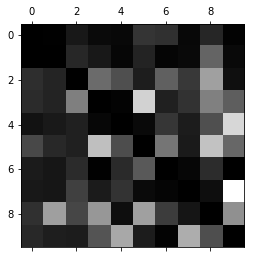

In [29]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)



row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#Visualizing most common error rates
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()